In [2]:
import pandas as pd
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

from pathlib import Path

In [3]:
sns.set_theme(style="darkgrid")

In [4]:
PROBABILITIES_FILE = Path("/Users/tobiaochsner/Documents/Thesis/Validation/data/yule-50_1.trees.log")

In [5]:
df_probabilities = pd.read_csv(PROBABILITIES_FILE)  

In [6]:
mcmc_probabilities = df_probabilities[df_probabilities.type == "mcmc"]
sample_probabilities = df_probabilities[df_probabilities.type == "sampled"]

In [7]:
mcmc_probabilities["credible_set"] = mcmc_probabilities.probability.apply(
    lambda p: 1 - stats.percentileofscore(sample_probabilities.probability, p) / 100,
)

/var/folders/f_/r0jt4c1153v7d286lm9gbgx80000gn/T/ipykernel_66993/3329221600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcmc_probabilities["credible_set"] = mcmc_probabilities.probability.apply(


Text(0.5, 0, 'Fraction of MCMC Trees')

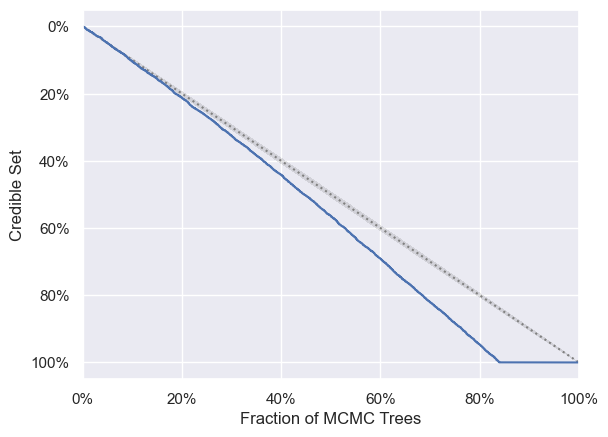

In [8]:
# plot x=y line

plt.plot([0, 1], [0, 1], color="grey", linestyle="dotted")

# plot ECDF
fig = sns.ecdfplot(mcmc_probabilities, y="credible_set")
fig.yaxis.set_major_formatter(PercentFormatter(1))
fig.xaxis.set_major_formatter(PercentFormatter(1))

# plot 95% confidence interval

num_bins = len(sample_probabilities)

for r in range(num_bins):
    lower_bound, upper_bound = stats.binom.interval(0.95, num_bins, r / num_bins)

    rect = plt.Rectangle(  # type: ignore
        (lower_bound / num_bins, r / num_bins),
        upper_bound / num_bins - lower_bound / num_bins,
        1 / num_bins,
        facecolor="black",
        alpha=0.1,
        linewidth=0
    )
    fig.add_patch(rect)

plt.gca().invert_yaxis()

plt.ylabel("Credible Set")
plt.xlabel("Fraction of MCMC Trees")

In [14]:
max(mcmc_probabilities.credible_set)

1.0

Text(0, 0.5, 'Fraction of MCMC Trees')

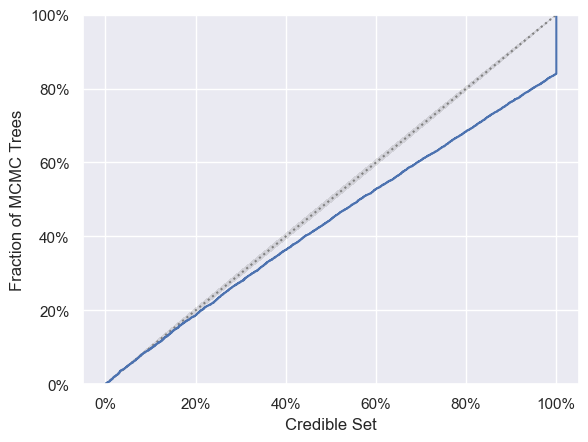

In [10]:
# plot x=y line

plt.plot([0, 1], [0, 1], color="grey", linestyle="dotted")

# plot ECDF
fig = sns.ecdfplot(mcmc_probabilities, x="credible_set")
fig.yaxis.set_major_formatter(PercentFormatter(1))
fig.xaxis.set_major_formatter(PercentFormatter(1))

# plot 95% confidence interval

num_bins = len(sample_probabilities)

for r in range(num_bins):
    lower_bound, upper_bound = stats.binom.interval(0.95, num_bins, r / num_bins)

    rect = plt.Rectangle(  # type: ignore
        (lower_bound / num_bins, r / num_bins),
        upper_bound / num_bins - lower_bound / num_bins,
        1 / num_bins,
        facecolor="black",
        alpha=0.1,
        linewidth=0
    )
    fig.add_patch(rect)

# plt.gca().invert_yaxis()

plt.xlabel("Credible Set")
plt.ylabel("Fraction of MCMC Trees")